## Business Understanding


### Overview
Tax authorities often struggle to efficiently identify taxpayers who pose non-compliance risks, resulting in revenue leakage and ineffective audit targeting. With limited resources, it's essential to prioritize audits based on risk levels. This project leverages historical taxpayer data to build a machine learning model that classifies taxpayers into High, Medium, or Low Risk categories. The insights generated can support smarter enforcement, better resource allocation, and improved tax compliance outcomes.



### Business Problem
Tax authorities need a reliable way to identify and prioritize risky taxpayers for audits and enforcement. 
This project seeks to develop a predictive model that uses taxpayer data to classify risk levels and enable more targeted, efficient compliance actions.

To address this, we aim to:
- Predict tax non-compliance risk.
- Identify key features/factors influencing non-compliance.
- Provide actionable insights to audit teams for targeted enforcement decisions.


## Data Understanding
The dataset being used for this project was obtained from kaggle. Here, we are going to review the dataset to assess the structure and characteristics of the data.

In [1]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\ruth\desktop\csa2025\group5_predicting_high_risk_taxpayers_using_ml\njoki\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
#importing necessary liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [3]:
#loading our data, that is in csv format
imported_data = pd.read_csv("../data/tax_risk_dataset.csv")

In [4]:
#make a copy of the original data
data=imported_data.copy()

In [5]:
# displaying the first five rows of our data
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


In [6]:
# displaying the las 5 records of our data
data.tail()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
995,996,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0.0,High
996,997,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,844610.21,0.51,9,0.0,High
997,998,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,668627.79,1.43,0,0.0,Medium
998,999,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0.0,High
999,1000,1171774.83,551019.47,47671.11,51606.48,3,2,Tech,620755.36,1.08,9,0.0,High


In [7]:
#knowing the number of rows and columns
data.shape

(1000, 13)

The data has 1000 rows and 13 columns.

In [8]:
# Get general information on the data and each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            1000 non-null   int64  
 1   Revenue                1000 non-null   float64
 2   Expenses               1000 non-null   float64
 3   Tax_Liability          1000 non-null   float64
 4   Tax_Paid               1000 non-null   float64
 5   Late_Filings           1000 non-null   int64  
 6   Compliance_Violations  1000 non-null   int64  
 7   Industry               1000 non-null   object 
 8   Profit                 1000 non-null   float64
 9   Tax_Compliance_Ratio   1000 non-null   float64
 10  Audit_Findings         1000 non-null   int64  
 11  Audit_to_Tax_Ratio     1000 non-null   float64
 12  Risk_Label             1000 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 101.7+ KB


We have found out that:
- 4 columns are of integer datatype.
- 7 columns are of datatype float.
- There are 2 columns with object datatype.

In [9]:
#get the summary statistics of the columns that contain numerical data.
data.describe()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.0
mean,500.500000,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.029000,1.033000,2.916324e+05,1.077180,4.396000,0.0
std,288.819436,2.937648e+05,1.994909e+05,14751.814482,10271.325437,1.415685,0.812756,3.617036e+05,0.617086,2.927414,0.0
min,1.000000,2.761980e+04,1.119223e+05,4707.320000,18705.510000,0.000000,0.000000,-7.801314e+05,0.240000,0.000000,0.0
25%,250.750000,8.057229e+05,5.787517e+05,40280.002500,40625.797500,1.000000,0.000000,4.100442e+04,0.767500,2.000000,0.0
50%,500.500000,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.000000,1.000000,2.856810e+05,0.970000,4.000000,0.0
75%,750.250000,1.194383e+06,8.457764e+05,59913.732500,54669.455000,3.000000,2.000000,5.514364e+05,1.210000,7.000000,0.0
max,1000.000000,2.155819e+06,1.338622e+06,108893.570000,80430.930000,4.000000,2.000000,1.401163e+06,10.190000,9.000000,0.0


As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

## Data prearation

#### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values.

In [10]:
#Dropping unnecesarry columns
data.drop(columns=["Taxpayer_ID","Audit_to_Tax_Ratio"],inplace=True)
data.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


In [11]:
#check for duplicates
data.duplicated().sum()

0

In [12]:
# validating that there are no missing values
data.isna().sum()

Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Risk_Label               0
dtype: int64

In [13]:
#encoding our risk label column using label encoder
risk_encoder = LabelEncoder()
data["Risk_Label"]=risk_encoder.fit_transform(data["Risk_Label"])
data.head(10)

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,2
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,1
5,929758.91,778697.08,53199.41,34645.18,0,2,Manufacturing,151061.83,0.65,8,0
6,1473763.84,879038.64,50018.08,52860.36,2,0,Healthcare,594725.20,1.06,1,2
7,1230230.42,827034.36,37743.67,32526.96,1,2,Finance,403196.06,0.86,3,0
8,859157.68,909910.54,59888.69,58826.91,3,0,Healthcare,-50752.86,0.98,0,0
9,1162768.01,592952.96,64063.55,43288.75,0,2,Healthcare,569815.05,0.68,1,0


In [14]:
imported_data.head(10)

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low
5,6,929758.91,778697.08,53199.41,34645.18,0,2,Manufacturing,151061.83,0.65,8,0.0,High
6,7,1473763.84,879038.64,50018.08,52860.36,2,0,Healthcare,594725.20,1.06,1,0.0,Medium
7,8,1230230.42,827034.36,37743.67,32526.96,1,2,Finance,403196.06,0.86,3,0.0,High
8,9,859157.68,909910.54,59888.69,58826.91,3,0,Healthcare,-50752.86,0.98,0,0.0,High
9,10,1162768.01,592952.96,64063.55,43288.75,0,2,Healthcare,569815.05,0.68,1,0.0,High


In [15]:
#encoding our Industry column using label encoder
industry_encoder=LabelEncoder()
data["Industry"]=industry_encoder.fit_transform(data["Industry"])
data.head(10)

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,0,169143.16,0.73,0,0
1,958520.71,884926.74,47832.22,39396.15,1,1,3,73593.97,0.82,0,2
2,1194306.56,711926.07,38113.70,43863.94,4,0,2,482380.49,1.15,3,0
3,1456908.96,570612.64,45380.58,66876.88,4,2,0,886296.32,1.47,1,0
4,929753.99,839644.66,21595.78,53565.53,0,0,4,90109.33,2.48,2,1
5,929758.91,778697.08,53199.41,34645.18,0,2,2,151061.83,0.65,8,0
6,1473763.84,879038.64,50018.08,52860.36,2,0,1,594725.20,1.06,1,2
7,1230230.42,827034.36,37743.67,32526.96,1,2,0,403196.06,0.86,3,0
8,859157.68,909910.54,59888.69,58826.91,3,0,1,-50752.86,0.98,0,0
9,1162768.01,592952.96,64063.55,43288.75,0,2,1,569815.05,0.68,1,0


We used label encoding over onehotencoding due to the nature of data we have. 
For the Risk_label, the label encoder has transformed: 
- high-0
- medium-2
- low-1
  
For Industry, the label encoder has transformed:
- Finance - 0
- Heathcare -1
- Manufacturing -2
- Retail -3
- Tech -4

## Exploratory Data Analysis
We'll explore key variables such as Risk Label, etc to understand their distributions and identify any patterns.

#### 1. Distribution of categorical data

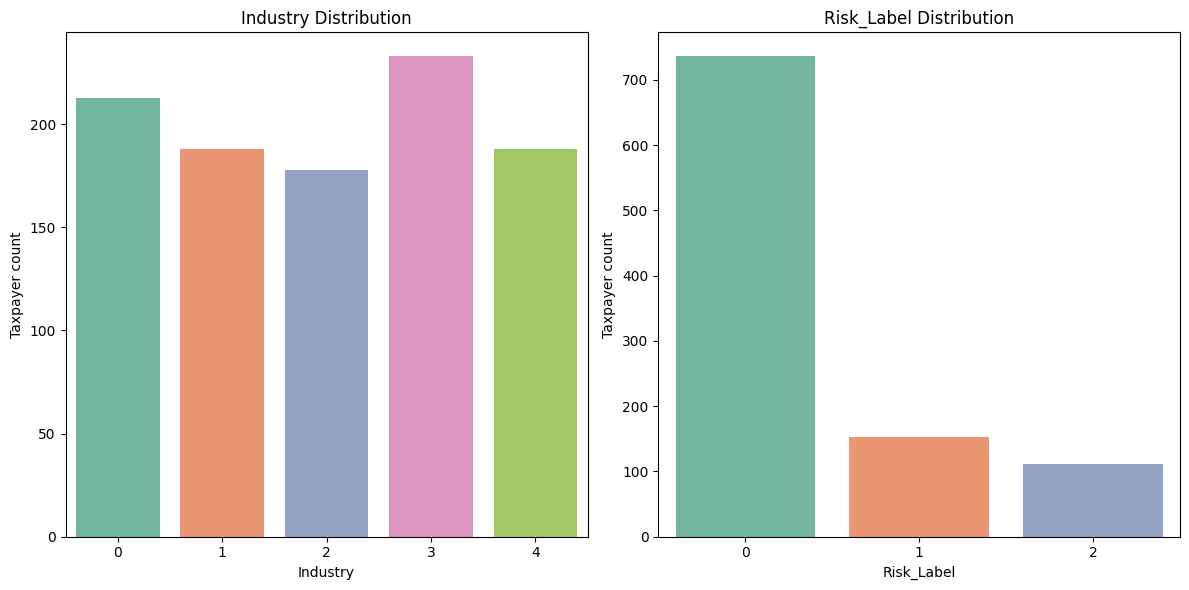

In [16]:
# List of columns with categorical data
cols = ["Industry", "Risk_Label"]

fig, axes = plt.subplots(1, len(cols), figsize=(12, 6))

# Loop through the columns and create count plots
for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Taxpayer count')
  

plt.tight_layout()
plt.show()

- The Retail industry accounts for the majority of taxpayers in the dataset.
- Most taxpayers are classified as having a high non-compliance risk.

### 2. Distribution of numerical features

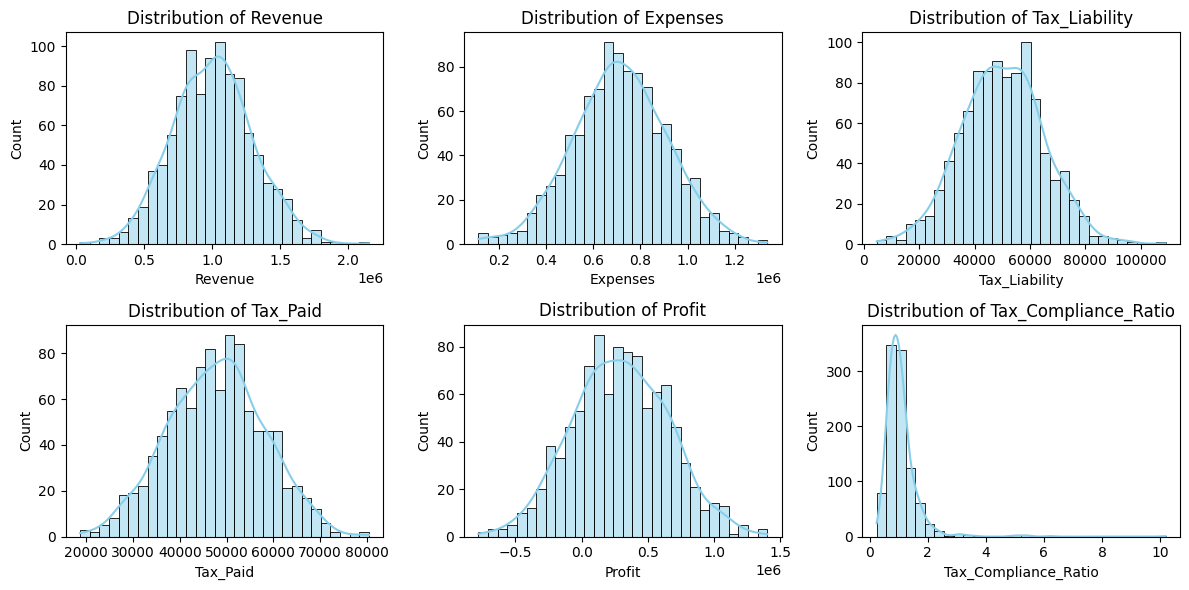

In [17]:
# List of columns with numerical data
numeric_cols = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
                'Profit', 'Tax_Compliance_Ratio']

plt.figure(figsize=(12, 6))
# Loop through the columns and create histogram plots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- **The distributions of Revenue, Expenses, Tax Liability, Tax Paid, and Profit** appear approximately normal, indicating that the data is symmetrically distributed around the mean. This suggests that the majority of taxpayers have average levels of income, expenses, tax obligations, payments, and profit.
- **The distribution of the Tax Compliance Ratio** is highly right-skewed, with a large concentration of taxpayers having a compliance ratio between 0 and 2.


### 3. Distribution of Industry by Risk_label

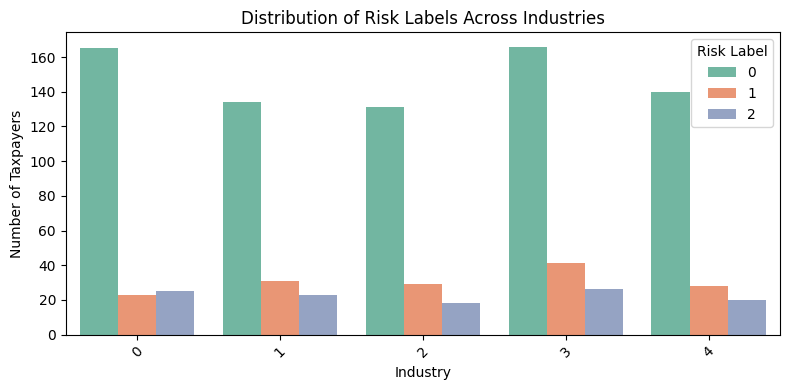

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Industry', hue='Risk_Label', palette='Set2')

plt.title('Distribution of Risk Labels Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Taxpayers')
plt.legend(title='Risk Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Across all industries,** the majority of taxpayers are classified as having a high non-compliance risk, indicating widespread potential non-compliance regardless of industry type. This is followed by taxpayers with low risk, while the medium risk category consistently represents the smallest proportion across sectors.

This pattern suggests that tax compliance challenges are not limited to specific industries but are broadly distributed, with a significant portion of taxpayers requiring closer monitoring or intervention to improve compliance behavior.

#### Relationship between Risk_label and columns with numerical data i.e Revenue, Expenses, Tax_Liability, Tax_Paid, Late_Filings, Compliance_Violations, Profit,Tax_Compliance_Ratio and Audit_Findings

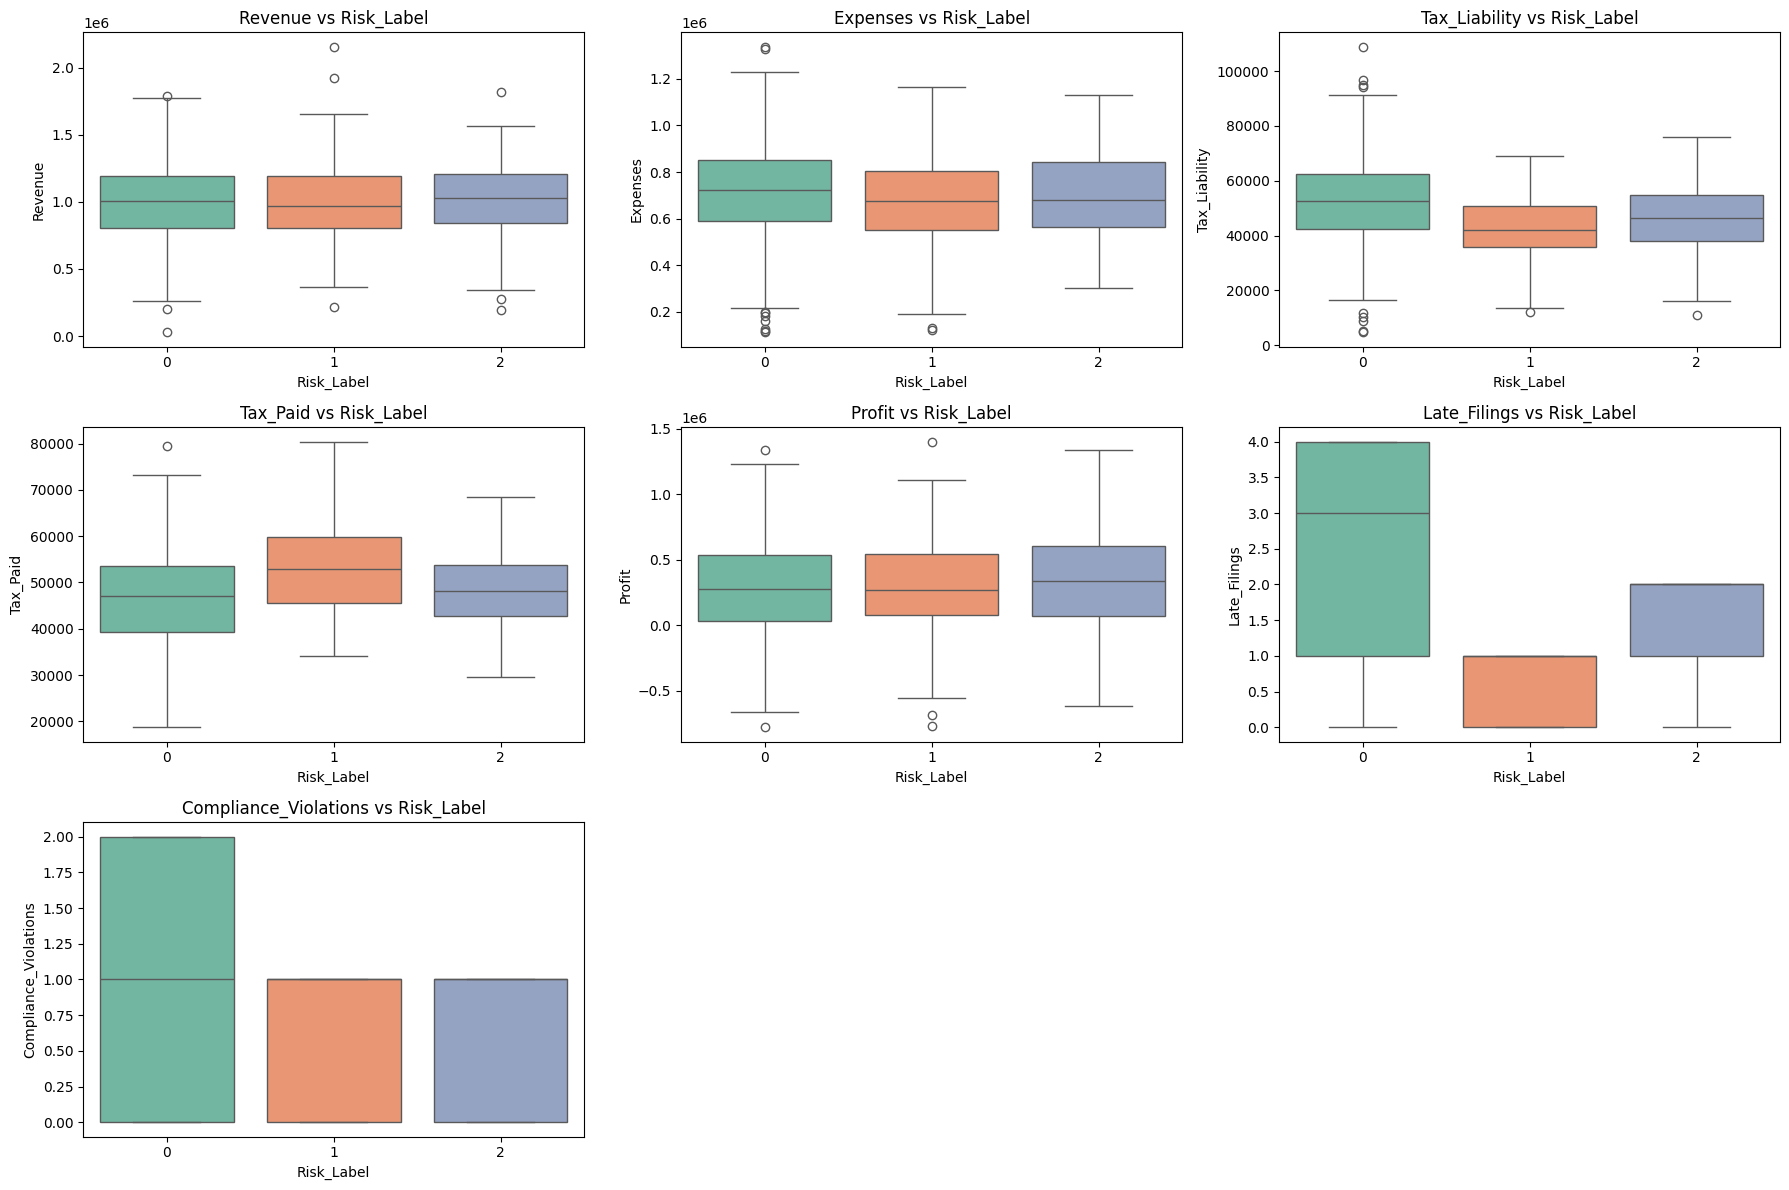

In [19]:
# Select only numerical columns (excluding 'Industry' and 'Risk_Label')
columns = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
                'Profit', 'Late_Filings','Compliance_Violations']

# Set up a grid of subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, col in enumerate(columns):
    sns.boxplot(data=data, x='Risk_Label', y=col, ax=axes[i], hue='Risk_Label', palette='Set2', legend=False)
    axes[i].set_title(f'{col} vs Risk_Label')
    axes[i].set_xlabel('Risk_Label')
    axes[i].set_ylabel(col)

# In case there are fewer columns than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # remove unused axes
    
plt.tight_layout()
plt.show()

**Revenue vs Risk Label**
- The distribution of revenue is similar across all risk levels (high, medium, and low).
- This suggests that revenue is not a strong predictor of taxpayer non-compliance risk.
  
**Expenses vs Risk Label**
- Expenses show little variation across risk categories.
- Therefore, expenses may also have limited influence on risk classification.
  
**Tax Liability vs Risk Label**
- High-risk taxpayers tend to have slightly higher tax liabilities, though with significant outliers, suggesting some taxpayers have significantly high tax liabilities than the rest.

**Tax paid vs Risk Label**
- Low risk taxpayers have paid their taxes well.
- This indicates that consistent tax payment behavior is associated with lower risk.
  
**profit vs Risk Label**
- The profit distributions are broadly similar across all risk levels.
- This implies that profitability alone does not determine non-compliance risk.
  
**Late Filings vs Risk Label**
- High-risk taxpayers have the most frequent late filings. It also clearly demostrated that low risk taxpayers file thier returns on time.
- This is a strong behavioral indicator of non-compliance risk.
  
**Compliance violations vs Risk Label**
- High-risk taxpayers have more compliance violations than others.
- Low- and medium-risk groups have similar and lower violation counts.
- Strongly suggests that violation history correlates with higher risk.


### Correlation Analysis

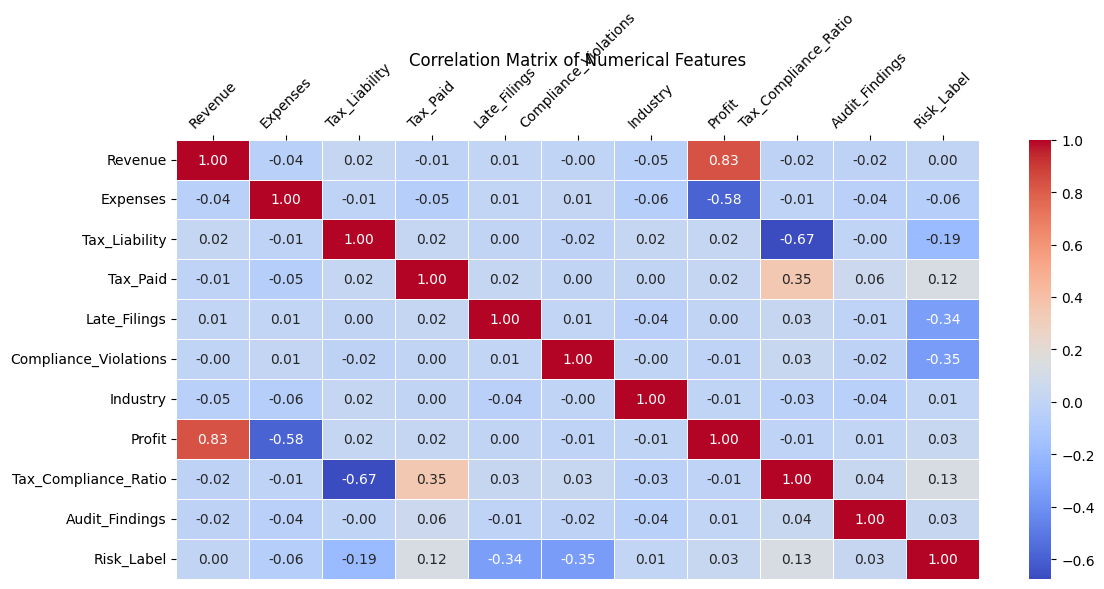

In [20]:
# Plot heatmap
num_data=data.select_dtypes(include="number")
plt.figure(figsize=(12, 6))
corr_matrix = num_data.corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # move ticks
ax.xaxis.set_label_position('top')  # move labels
plt.xticks(rotation=45)  # rotate x labels for readability
plt.title("Correlation Matrix of Numerical Features", y=1.15)  # push title up

plt.tight_layout()
plt.show()

Our correlation matrix include labels that show a high collinearlity which could lead to model overfitting. The rule of thumb is to drop any feature that has pairwise correlation higher than 0.5 regardless of the value being negative or positive.

After identifying the features which exceed pairwise correlation of 0.5, we then compare them with our target variable (Risk_Label).
We keep any feature that has stronger correlation with our target variable as demostrated below.

In [21]:
data['Risk_Label'].corr(data['Revenue'])

0.0006182007164551568

In [22]:
data['Profit'].corr(data['Risk_Label'])

0.03271701750978348

In [23]:
data['Expenses'].corr(data['Risk_Label'])

-0.05840997706540255

In [24]:
data['Tax_Liability'].corr(data['Risk_Label'])

-0.1924179101944633

In [25]:
data['Tax_Compliance_Ratio'].corr(data['Risk_Label'])

0.12712775050282502

### Replotting Heat map

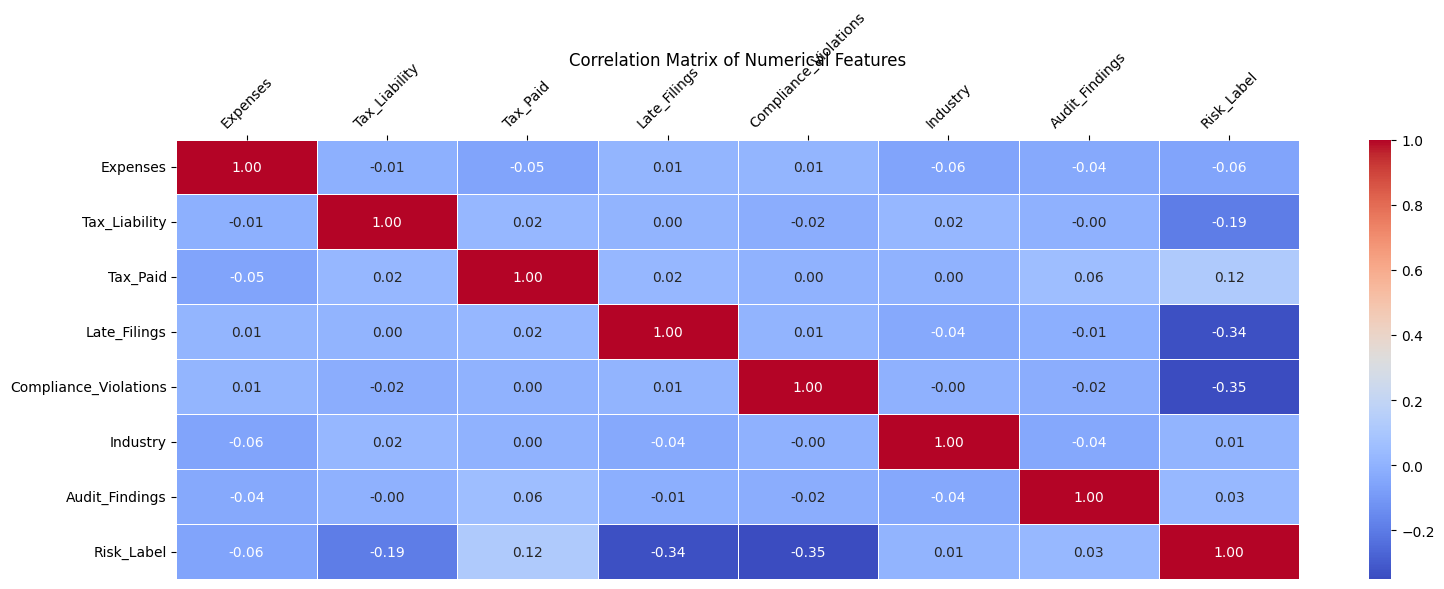

In [26]:
# replot heatmap
num_data=data.select_dtypes(include="number")
plt.figure(figsize=(16, 6))
corr_matrix = num_data.drop(columns = ["Revenue", "Profit",'Tax_Compliance_Ratio']).corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # move ticks
ax.xaxis.set_label_position('top')  # move labels
plt.xticks(rotation=45)  # rotate x labels for readability
plt.title("Correlation Matrix of Numerical Features", y=1.15)  # push title up

plt.tight_layout()
plt.show()

### Train-Test Split

In [27]:
# Define Features and Target
X = data.drop(columns=['Risk_Label',"Revenue", "Profit",'Tax_Compliance_Ratio'])
y = data['Risk_Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE for Risk label Imbalance

There is a clear imbalance of the target variable 'Risk_Label' with a large number of high risk taxpayers as compared to medium and low, as shown in count plot Risk Label above. This imbalance could affect model performance, especially for algorithms like Logistic Regression, which are sensitive to class imbalance.

We are going to apply SMOTE to the training dataset. SMOTE will generate synthetic samples to balance the dataset, making the minority class more represented and helping the Logistic Regression model make better predictions for risky taxpayers.

In [28]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Standardization
To ensure that each feature contributes equally to the model.

In [29]:
cat=["Industry"]
num=X.drop(cat,axis=1).columns

# Initialize StandardScaler
std_scaler=StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train[num])
X_train_scaled_resampled=std_scaler.fit_transform(X_train_resampled[num])
X_test_scaled = std_scaler.transform(X_test[num])

# Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_train_scaled_resampled=pd.DataFrame(X_train_scaled_resampled,columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

# Combine scaled numerical columns with categorical one, that is Industry.
X_train_scaled = pd.concat([X_train_scaled, X_train[cat].reset_index(drop=True)], axis=1)
X_train_scaled_resampled=pd.concat([X_train_scaled_resampled,X_train_resampled[cat].reset_index(drop=True)],axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[cat].reset_index(drop=True)], axis=1)


In [30]:
X_train_scaled.sample()

,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Audit_Findings,Industry
443,0.004142,-0.286133,0.378773,0.70204,-1.291593,1.597472,3


In [31]:
X_train_scaled_resampled.sample()

,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Audit_Findings,Industry
117,0.570828,1.023372,0.338145,-0.309581,1.839988,-0.865385,0


In [32]:
X_test_scaled.sample()

,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Audit_Findings,Industry
106,-0.234891,-0.834275,-2.202255,-0.309581,-0.851565,0.994415,0


## Modelling

We will be comparing two models here:

- Logistic regression model. 
- Random forest classifier.

### 1. Logistic Regression

In [33]:
# Logistic regression model
# model initialization
logreg=LogisticRegression(max_iter=1000, random_state=42)

# Train models on the resampled, scaled training data
logreg.fit(X_train_scaled_resampled,y_train_resampled)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)



### Model Evaluation

In [34]:
from sklearn.preprocessing import label_binarize

# Logistic Regression results
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))

# Binarize the multiclass labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Ensure order matches encoded labels

# Get predicted probabilities for each class
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)

# Compute ROC AUC for multiclass (one-vs-rest)
roc_auc_logreg = roc_auc_score(y_test_bin, y_pred_proba_logreg, multi_class='ovr')
print(f"Logistic Regression ROC-AUC Score: {roc_auc_logreg:.4f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       146
           1       0.68      0.78      0.72        32
           2       0.32      0.55      0.41        22

    accuracy                           0.78       200
   macro avg       0.65      0.71      0.67       200
weighted avg       0.83      0.78      0.79       200

Logistic Regression ROC-AUC Score: 0.9179


### ROC Curve : Receiver Operating characteristic

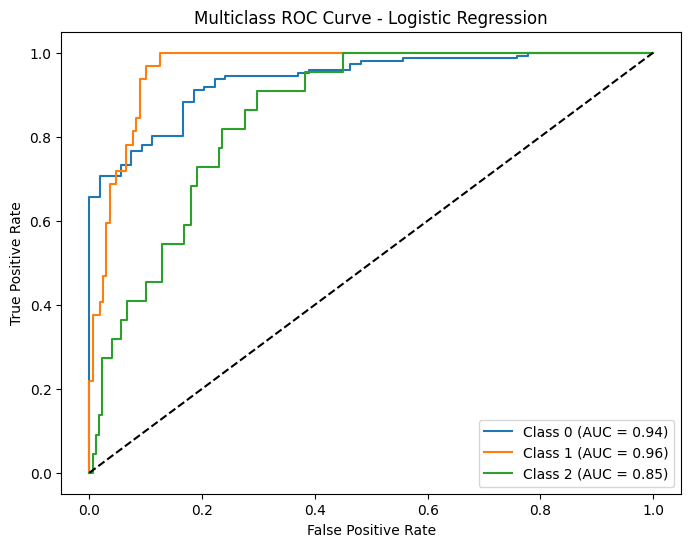

In [35]:
# Binarize labels (for 3 classes: 0=High, 1=Low, 2=Medium)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_logreg[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Logistic Regression")
plt.legend()
plt.show()

### 2. Random Forest Classifier

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on SMOTE-resampled and scaled data
rf_clf.fit(X_train_scaled_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [37]:
# Class predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
# Ensure y_test is binarized for multiclass AUC calculation
y_test_bin_rf = label_binarize(y_test, classes=[0, 1, 2])

# Compute AUC score (One-vs-Rest)
roc_auc_rf = roc_auc_score(y_test_bin_rf, y_pred_proba_rf, multi_class='ovr')

print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       146
           1       0.97      0.94      0.95        32
           2       0.79      0.86      0.83        22

    accuracy                           0.96       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.96      0.96      0.96       200

Random Forest ROC-AUC Score: 0.9918


### ROC Curve

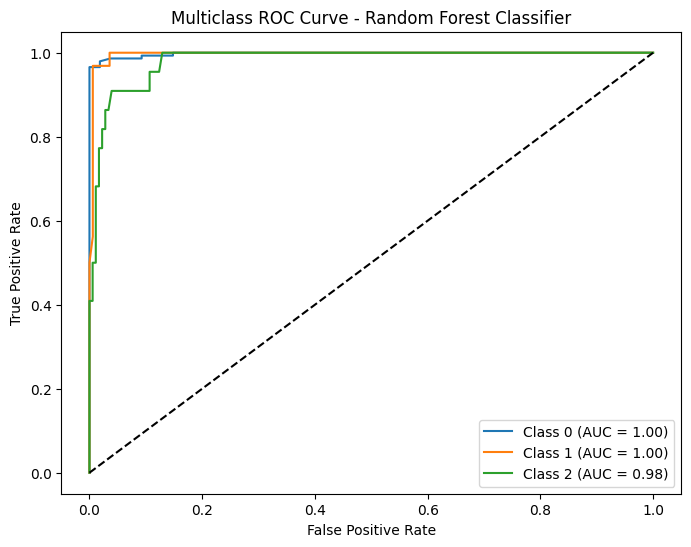

In [38]:
# Binarize labels (for 3 classes: 0=High, 1=Low, 2=Medium)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Random Forest Classifier")
plt.legend()
plt.show()

## Comparison between the logistic regression model and the random forest classifier
**Overall Accuracy**

- **Logistic Regression:** Accuracy is 0.78, the model performs moderately well, but struggles particularly with the Medium Risk class (F1-score = 0.41). This brings down its overall reliability in multi-class classification.
- **Random Forest:** Accuracy is 0.96, excellent overall performance. The model correctly classifies nearly all cases, including the often-confused Medium Risk group (F1-score = 0.83). Strong generalization across all classes.

  
**ROC-AUC Score**
- **Logistic Regression ROC-AUC** = 0.9179: A solid score, indicating decent ability to rank risk levels. However, the model struggles with class separation, especially for less represented classes.
- **Random Forest ROC-AUC** = 0.9918: Random forest performs significantly better, with a higher AUC score, indicating that it is better at distinguishing between high, low and medium cases.

## Feature Importance Analysis

In this section, we analyze the importance of each feature (column) in predicting non-compliance risk using the Random Forest classifier. Feature importance quantifies how much each feature contributes to the model's decision-making process.

Top Features Contributing to tax Non-Compliance Risk Prediction:
                 Feature  Importance
3           Late_Filings    0.376233
4  Compliance_Violations    0.171886
1          Tax_Liability    0.156917
2               Tax_Paid    0.140442
0               Expenses    0.085379
5               Industry    0.035812
6         Audit_Findings    0.033331


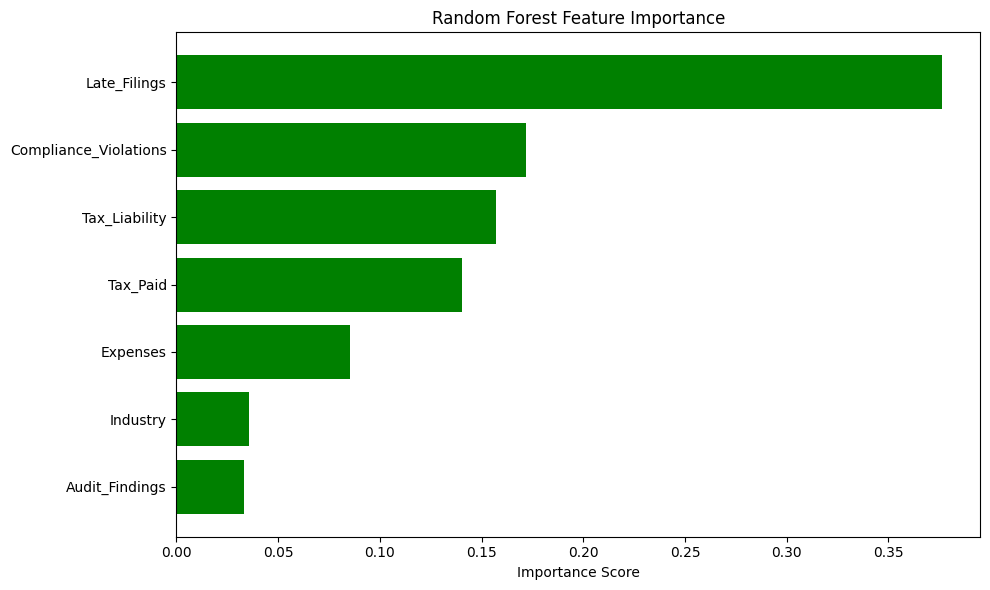

In [39]:
# Get feature importance from the trained Random Forest model
importances = rf_clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Top Features Contributing to tax Non-Compliance Risk Prediction:")
print(feature_importance_df)

# Plot the top N features (optional: limit to top 10 or 15 for clarity)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')

# Show most important feature at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Late Filings, Compliance Violations, and Tax Liability as the strongest predictors of tax non-compliance risk. This suggests that taxpayers who consistently file returns late or have a history of compliance breaches are significantly more likely to be classified as high-risk. High tax liability also increases risk, possibly due to the increased incentive or opportunity for evasion.

On the other hand, features such as Industry and Audit Findings contribute less to the prediction. 

### Model Saving and Deployment

In [40]:
#saving the model

import joblib

# Example: Saving the Random Forest model
joblib.dump(rf_clf, 'random_forest_model.pkl')



['random_forest_model.pkl']


### Model Deployment Using Streamlit

#### Step 1: Create a Streamlit App (`app.py`)

we created a new Python file named `app.py` as shown below:

```python

import streamlit as st
import joblib
import numpy as np

# Load trained model
model = joblib.load('random_forest_model.pkl')


# Title of the app
st.title("Risky Taxpayer Prediction")

# Input form
st.header("Enter Taxpayer Details")

# Updated input features based on your model
late_filings = st.number_input("Late Filings", min_value=0)
compliance_violations = st.number_input("Compliance Violations", min_value=0)
tax_liability = st.number_input("Tax Liability", min_value=0.0)
tax_paid = st.number_input("Tax Paid", min_value=0.0)
expenses = st.number_input("Expenses", min_value=0.0)
industry = st.selectbox("Industry (Encoded)", options=[0, 1, 2, 3, 4])  # Replace with real industry labels if available
audit_findings = st.number_input("Audit Findings", min_value=0)

# Prediction
if st.button("Predict Risk Level"):
    # Prepare feature array
    features = np.array([[expenses, tax_liability, tax_paid, late_filings,
                          compliance_violations, industry, audit_findings]])

    # Apply scaling if needed
    # features = scaler.transform(features)

    prediction = model.predict(features)[0]

    # Map output to label
    risk_labels = {0: "High", 1: "Low", 2: "Medium"}
    st.success(f"Predicted Risk Level: **{risk_labels.get(prediction, 'Unknown')}**")


```

---

#### Step 2: Run the Streamlit App

Open your terminal and run:

```bash
streamlit run app.py
```

Streamlit will launch the app in your default web browser.

---



## Conclusion

The Random Forest Classifier emerged as the most effective model, achieving high accuracy (96%) and an excellent ROC-AUC score (0.9918), demonstrating strong discriminatory power across all risk levels.

Feature importance analysis revealed that Late Filings, Compliance Violations, and Tax Liability are the most influential predictors of tax non-compliance. These insights can help tax authorities prioritize audits, allocate resources efficiently, and implement targeted enforcement strategies.

## Recommendations

For tax non-compliance prediction, Random Forest should be prioritized, especially when dealing with imbalanced data.

- As shown in feature importance analysis:
  
Enhance Monitoring of Key Risk Indicators
Focus on top predictive features such as Late Filings, Compliance Violations, and Tax Liability. Taxpayers with frequent issues in these areas should be flagged for closer scrutiny.

## Limitations of current work

Class Imbalance

The dataset had an imbalanced distribution of risk categories (high, medium, low), which required resampling (SMOTE).

While this improved performance, it may still introduce bias or overfitting.

## Expectation for future work

Industry-Specific Models
Develop specialized models for different industries/sectors to capture unique compliance patterns and improve accuracy.